# Task 10 - Part Nr. 1

### Overall Goal: goal will be to provide better insight for customer profiling in terms of ads, bonus programs, and sales information.

## 1.- Importing Libraries & Dataframe 

In [6]:
#importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
# Importing dataframe 

path = r'C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\4.3_orders_products'

df_combined = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'Data_combined_13_11.pkl'))

In [12]:
df_combined.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_dependents,family_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,prior,1,2,8,NaN,14084,2,0,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 2.- Adress PII Data 

In [10]:
# Drop PII columns
df_combined = df_combined.drop(columns=['first_name','last_name'])


In [12]:

# Verifying if the columns first and last name are dropped
df_combined.head(2)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spender_flag,Customer_frequency,frequency_flag,gender,state,age,date_joined,num_dependents,family_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,prior,1,2,8,NaN,14084,2,0,...,Low_spender,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423


## 3.- Customer behavior comparison per geographic areas

### 3.1 Creating the column region 

In [14]:
state_region = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 'New Hampshire': 'Northeast', 
    'Rhode Island': 'Northeast', 'Vermont': 'Northeast', 'New Jersey': 'Northeast', 'New York': 'Northeast', 
    'Pennsylvania': 'Northeast', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest', 'Ohio': 'Midwest', 
    'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest', 
    'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Delaware': 'South', 'Florida': 'South', 
    'Georgia': 'South', 'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South', 'Virginia': 'South', 
    'West Virginia': 'South', 'Alabama': 'South', 'Kentucky': 'South', 'Mississippi': 'South', 'Tennessee': 'South', 
    'Arkansas': 'South', 'Louisiana': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arizona': 'West', 'Colorado': 'West', 
    'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West', 
    'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 'Washington': 'West',
    'District of Columbia': 'South'
}

# Map the full state names to regions
df_combined['Region'] = df_combined['state'].map(state_region)

# Check for missing values in the 'Region' column again
missing_values_region = df_combined['Region'].isnull().sum()
print(f"Number of missing values in 'Region': {missing_values_region}")

Number of missing values in 'Region': 0


In [16]:
df_combined['Region'].value_counts(dropna=False)

Region
South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: count, dtype: int64

### 3.2 Difference in spending habits between the different U.S. regions

In [18]:
#Creating a crosstab
crosstab = pd.crosstab(df_combined['Region'], df_combined['spender_flag'], dropna=False)

# Print the crosstab to see the distribution
print(crosstab)


spender_flag  High_spender  Low_spender
Region                                 
Midwest             156084      7447932
Northeast           108276      5620168
South               209878     10592104
West                160440      8140177


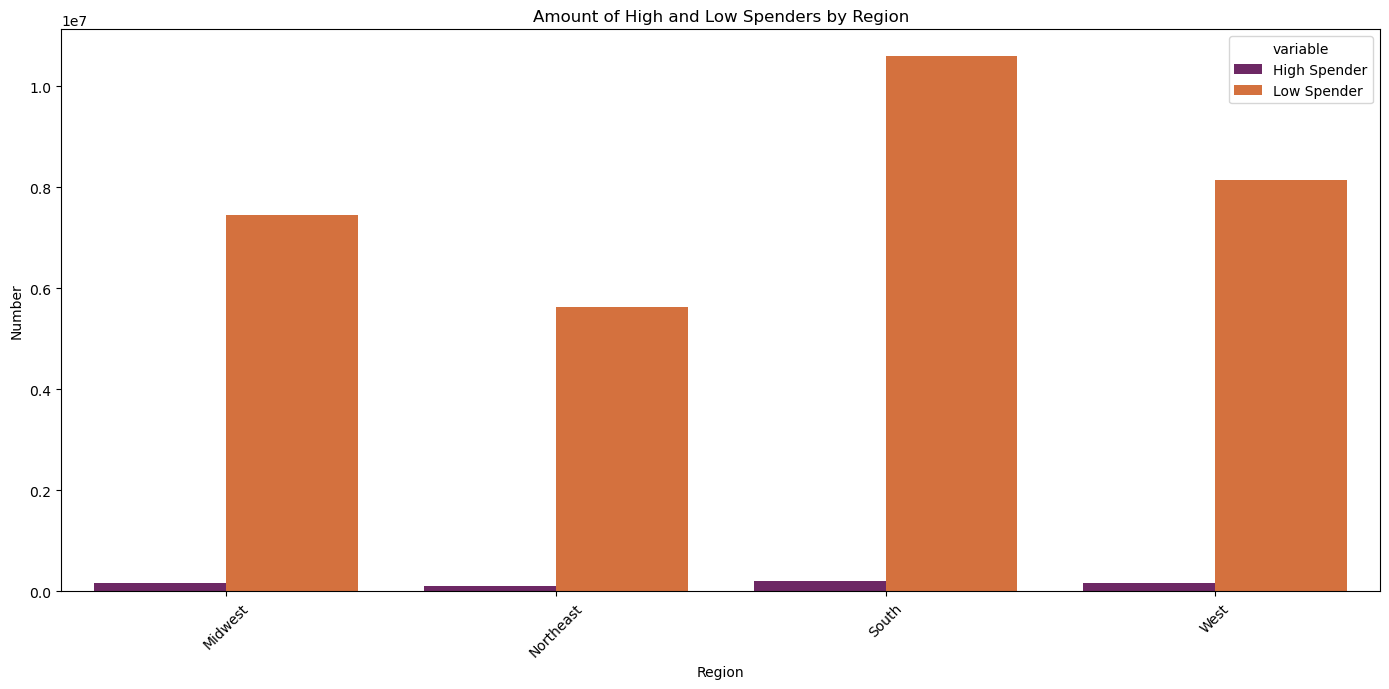

In [20]:
# aggregation step
region_spending_hab = df_combined.groupby(['Region', 'spender_flag']).size().unstack(fill_value=0).reset_index()

# Rename columns
region_spending_hab.columns = ['Region', 'High Spender', 'Low Spender']

# Buyer per region
region_spending_hab['Total Buyer'] = region_spending_hab['High Spender'] + region_spending_hab['Low Spender']

# Create the bar chart to see the differences between the regions 
plt.figure(figsize=(14, 7))
sns.barplot(data=region_spending_hab.melt(id_vars='Region', value_vars=['High Spender', 'Low Spender']), 
            x='Region', y='value', hue='variable', palette='inferno')

# Customize the plot
plt.title('Amount of High and Low Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.tight_layout()

# Define the directory and file path for saving the plot
path_visual = r'C:\Users\cmfag\OneDrive\Desktop\Data Analyst Specialist\Achievement 4\4.3_orders_products\04 Analysis\Visualizations\Task 4.10'
file_path = os.path.join(path_visual, 'spending_behaivour_by_region.png')


# Ensure the directory exists
if not os.path.exists(path_visual):
    os.makedirs(path_visual)

# Save the plot
plt.savefig(file_path)
plt.show()

#### Conclusions: The region with the highest number of Instacart customers in the US is the South, which has the largest proportion of both low spenders and high spenders. The South is followed by the West, Midwest, and Northeast regions. Overall, the visualization shows a relatively similar distribution of high and low spenders across regions.

## 4.- Low-activity Customers

Conditions: Low-activity Customers are customers with less than 5 orders.

Task: 

1.- Create a level with Low-activity Customers --> Level name: low-activity-customers

2.- Exclude the Low-activity Customers our of the dataframe and rename the df to --> df_combined_filtered



In [22]:
df_combined['max_order'] = df_combined.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\cmfag\AppData\Local\Temp\ipykernel_19624\2074315342.py:1: FutureWarning: The provided callable <function max at 0x0000023369E2C860> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_combined['max_order'] = df_combined.groupby(['user_id'])['order_number'].transform(np.max)


In [24]:
# Creating the level

df_combined.loc[df_combined['max_order'] < 5, 'exclusion_flag'] = 'Low-activity customer'
df_combined.loc[df_combined['max_order'] >= 5, 'exclusion_flag'] = 'Regular-activity customer'

df_combined ['exclusion_flag'].value_counts()

exclusion_flag
Regular-activity customer    30993489
Low-activity customer         1441570
Name: count, dtype: int64

In [28]:
exclusion_counts = df_combined.groupby('exclusion_flag')['user_id'].nunique().reset_index()
exclusion_counts.columns = ['exclusion_flag', 'unique_user_count']  # Rename columns

#verifiying the count of both flags

exclusion_counts

,exclusion_flag,unique_user_count
0,Low-activity customer,43576
1,Regular-activity customer,162633


In [30]:
df_combined_filtered = df_combined.loc[df_combined['exclusion_flag'] != 'Low-activity customer']

#verif. counts

df_combined_filtered['exclusion_flag'].value_counts()

exclusion_flag
Regular-activity customer    30993489
Name: count, dtype: int64

In [32]:
df_combined_filtered['user_id'].nunique()

162633

In [34]:
#Exporting data 

df_combined_filtered.to_pickle(os.path.join(path, '02 Data','Prepared Data','Data_combined_15_11.pkl'))
